In [146]:
# 📘 Used Car Price Estimator using Decision Tree Regression

# 🚀 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [147]:
# 📥 Step 2: Load the Dataset
df = pd.read_csv("used_cars_dataset_v2.csv")
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


In [148]:
# 🧹 Step 3: Data Preprocessing

# Drop rows with missing values
df.dropna(inplace=True)

In [149]:
# Create 'car_age' feature

df.drop('Year', axis=1, inplace=True)

In [150]:
# Clean kmDriven
df['kmDriven'] = df['kmDriven'].str.replace(' km', '', regex=False).str.replace(',', '').astype(float)


In [151]:
# Clean AskPrice
df['AskPrice'] = df['AskPrice'].str.replace('₹', '', regex=False).str.replace(',', '').astype(int)


In [152]:

# Drop unusable columns
df.drop(['AdditionInfo'], axis=1, inplace=True)
df.drop(['PostedDate'], axis=1, inplace=True)


In [153]:

# One-hot encode categorical columns
categorical_cols = ['Brand', 'model', 'Transmission', 'Owner', 'FuelType']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [154]:

# Define features and target
X = df_encoded.drop('AskPrice', axis=1)
y = df_encoded['AskPrice']

In [155]:
df.head()

,Brand,model,Age,kmDriven,Transmission,Owner,FuelType,AskPrice
0,Honda,City,23,98000.0,Manual,second,Petrol,195000
1,Toyota,Innova,15,190000.0,Manual,second,Diesel,375000
2,Volkswagen,VentoTest,14,77246.0,Manual,first,Diesel,184999
3,Maruti Suzuki,Swift,7,83500.0,Manual,second,Diesel,565000
4,Maruti Suzuki,Baleno,5,45000.0,Automatic,first,Petrol,685000


In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [157]:
# 🔄 Step 6: Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [158]:
# 🌳 Step 7: Train Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [159]:
# 📊 Step 8: Evaluate the Model
# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 1183860.532754619
R² Score: 0.458023844306644


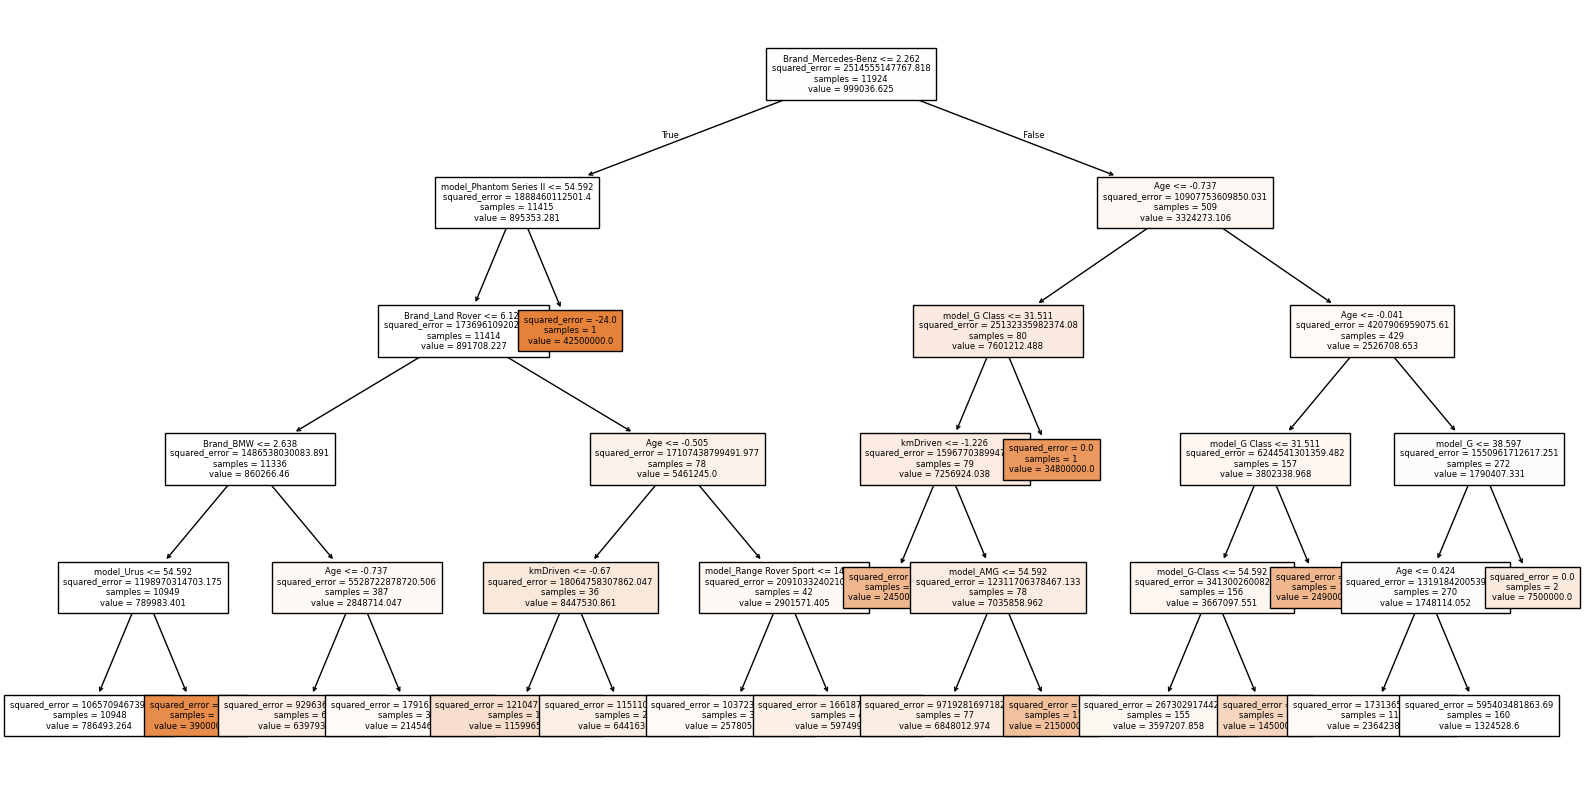

In [160]:
# 🌲 Step 9: Visualize the Tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, filled=True, fontsize=6)
plt.show()

In [161]:
# Example user input (replace values as needed)
user_input = {
    'Brand': 'Land Rover',
    'model': 'Range Rover Evoque',
    'Age': 20,
    'kmDriven': 200000.0,
    'Transmission': 'Automatic',
    'Owner': 'first',
    'FuelType': 'Diesel'
}


In [162]:
# Convert to DataFrame
input_df = pd.DataFrame([user_input])

In [163]:
# Clean numeric fields
input_df['kmDriven'] = input_df['kmDriven']

In [164]:
# One-hot encode the input to match training columns
input_encoded = pd.get_dummies(input_df)

In [165]:
# Add missing columns (in training but not in input)
for col in X.columns:
    if col not in input_encoded.columns:
        input_encoded[col] = 0

/tmp/ipython-input-165-1075752355.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_encoded[col] = 0
/tmp/ipython-input-165-1075752355.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_encoded[col] = 0
/tmp/ipython-input-165-1075752355.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

In [166]:
# Ensure column order matches training data
input_encoded = input_encoded[X.columns]

In [167]:
# Scale the input
input_scaled = scaler.transform(input_encoded)

In [168]:

# Predict
predicted_price = model.predict(input_scaled)[0]

In [169]:
# Display
print(f"Predicted Ask Price: ₹ {int(predicted_price):,}")

Predicted Ask Price: ₹ 2,578,052
